## ARMA Modeling: Unit Root Testing

**Functions**

`sm.tsa.stattools.adfuller`, `arch.unitroot.ADF` 

### Exercise 72
Download data on the AAA and BAA yields (Moodys) from FRED and construct the
default premium as the difference between these two.

1. Test the default premium for a unit root. 
2. If you find a unit root, test the change.

In [1]:
import pandas as pd
import pandas_datareader as pdr

# Conservative start date to get all data
aaa = pdr.get_data_fred("AAA", start="1950")
baa = pdr.get_data_fred("BAA", start="1950")

default = aaa["AAA"] - baa["BAA"]
default.name = "Default"

<Axes: xlabel='DATE'>

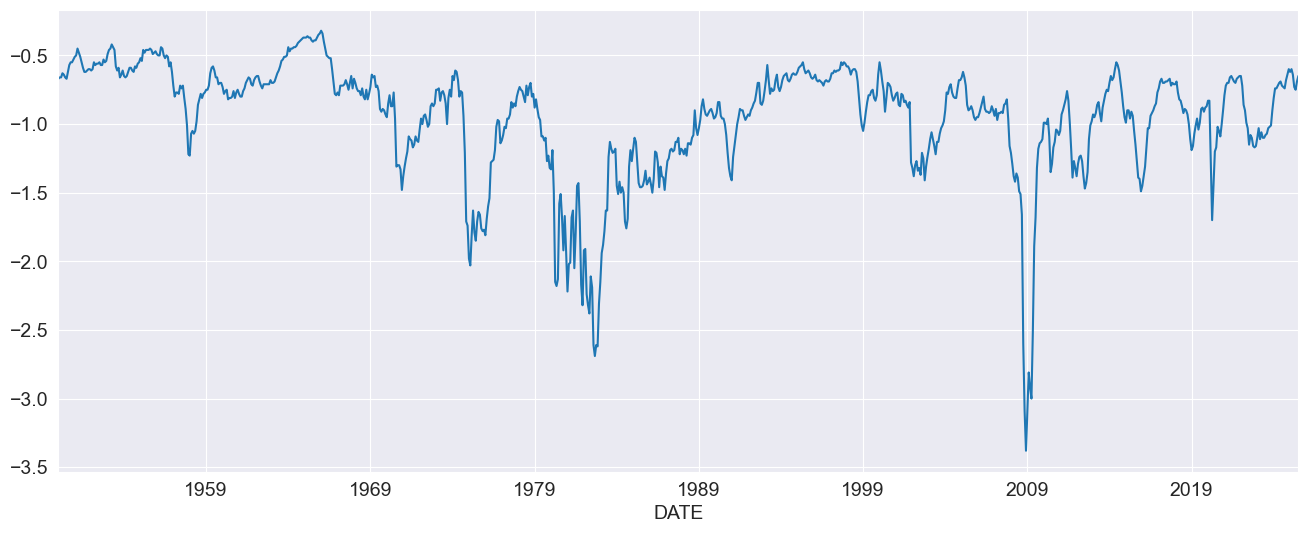

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

default.plot.line()

In [3]:
from arch.unitroot import ADF

adf = ADF(default, trend="ct")
adf.summary()

Test Statistic,-3.648
P-value,0.026
Lags,16


In [4]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     10.83
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           2.94e-28
Time:                        15:18:09   Log-Likelihood:                 832.04
No. Observations:                 890   AIC:                            -1626.
Df Residuals:                     871   BIC:                            -1535.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0342      0.009     -3.648      0.000      -0.053      -0.016
Diff.L1        0.3656      0.034     10.786      0.000       0.299       0.432
Diff.L2       -0.1324      0.036     -3.679      0.000      -0.203      -0.062
Diff.L3        0.0218      0.036      0.603      0.547      -0.049       0.093
Diff.L4       -0.0069      0.036     -0.191      0.848      -0.078       0.064
Diff.L5        0.1236      0.036      3.425      0.001       0.053       0.194
Diff.L6       -0.0391      0.036     -1.077      0.282      -0.110       0.032
Diff.L7       -0.0878      0.036     -2.429      0.015      -0.159      -0.017
Diff.L8       -0.0077      0.036     -0.212      0.832      -0.079       0.064
Diff.L9        0.0561      0.036      1.549      0.122      -0.015       0.127
Diff.L10      -0.0790      0.036     -2.191      0.029      -0.150      -0.008
Diff.L11       0.0410      0.036      1.138      0.256      -0.030       0.112
Diff.L12      -0.0289      0.036     -0.802      0.423      -0.099       0.042
Diff.L13      -0.0437      0.036     -1.215      0.225      -0.114       0.027
Diff.L14       0.0800      0.036      2.224      0.026       0.009       0.151
Diff.L15      -0.0423      0.036     -1.187      0.236      -0.112       0.028
Diff.L16      -0.0577      0.034     -1.705      0.089      -0.124       0.009
const         -0.0300      0.010     -3.046      0.002      -0.049      -0.011
trend      -6.345e-06    1.3e-05     -0.488      0.625   -3.18e-05    1.91e-05
==============================================================================
Omnibus:                      402.626   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8953.483
Skew:                          -1.531   Prob(JB):                         0.00
Kurtosis:                      18.234   Cond. No.                     8.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
adf = ADF(default, trend="c")
adf.summary()

Test Statistic,-3.648
P-value,0.005
Lags,16


In [6]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     11.47
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           9.49e-29
Time:                        15:18:09   Log-Likelihood:                 831.91
No. Observations:                 890   AIC:                            -1628.
Df Residuals:                     872   BIC:                            -1542.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0330      0.009     -3.648      0.000      -0.051      -0.015
Diff.L1        0.3647      0.034     10.780      0.000       0.298       0.431
Diff.L2       -0.1333      0.036     -3.711      0.000      -0.204      -0.063
Diff.L3        0.0209      0.036      0.579      0.563      -0.050       0.092
Diff.L4       -0.0078      0.036     -0.216      0.829      -0.079       0.063
Diff.L5        0.1227      0.036      3.406      0.001       0.052       0.193
Diff.L6       -0.0400      0.036     -1.103      0.270      -0.111       0.031
Diff.L7       -0.0886      0.036     -2.455      0.014      -0.159      -0.018
Diff.L8       -0.0085      0.036     -0.234      0.815      -0.080       0.063
Diff.L9        0.0554      0.036      1.530      0.126      -0.016       0.126
Diff.L10      -0.0796      0.036     -2.211      0.027      -0.150      -0.009
Diff.L11       0.0404      0.036      1.122      0.262      -0.030       0.111
Diff.L12      -0.0295      0.036     -0.822      0.411      -0.100       0.041
Diff.L13      -0.0443      0.036     -1.234      0.217      -0.115       0.026
Diff.L14       0.0794      0.036      2.209      0.027       0.009       0.150
Diff.L15      -0.0428      0.036     -1.203      0.229      -0.113       0.027
Diff.L16      -0.0585      0.034     -1.730      0.084      -0.125       0.008
const         -0.0317      0.009     -3.436      0.001      -0.050      -0.014
==============================================================================
Omnibus:                      402.646   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9003.792
Skew:                          -1.529   Prob(JB):                         0.00
Kurtosis:                      18.279   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 73

Download data on consumer prices in the UK from the ONS.

1. Test the log of CPI for a unit root. 
2. If you find a unit root, test inflation for one.

<Axes: xlabel='DATE'>

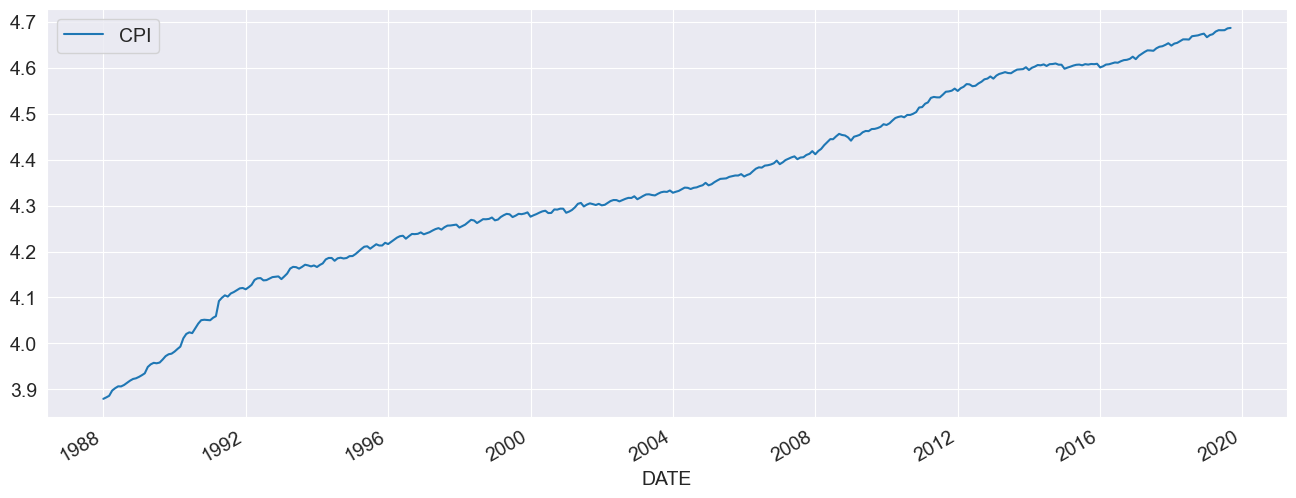

In [7]:
import numpy as np

cpi = pd.read_excel("data/uk-cpi-ons.xlsx", index_col="DATE")
lncpi = np.log(cpi)
plt.rc("figure", figsize=(16, 6))
plt.rc("font", size=14)

lncpi.plot.line()

In [8]:
adf = ADF(lncpi, trend="ct")
adf.summary()

Test Statistic,-3.972
P-value,0.010
Lags,14


In [9]:
adf.regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     35.38
Date:                Wed, 27 Aug 2025   Prob (F-statistic):           3.66e-63
Time:                        15:18:10   Log-Likelihood:                 1668.8
No. Observations:                 366   AIC:                            -3304.
Df Residuals:                     349   BIC:                            -3237.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level.L1      -0.0200      0.005     -3.972      0.000      -0.030      -0.010
Diff.L1        0.0845      0.052      1.615      0.107      -0.018       0.187
Diff.L2        0.0731      0.052      1.406      0.161      -0.029       0.175
Diff.L3       -0.0121      0.037     -0.325      0.745      -0.085       0.061
Diff.L4       -0.0073      0.037     -0.196      0.845      -0.080       0.066
Diff.L5       -0.0623      0.037     -1.680      0.094      -0.135       0.011
Diff.L6        0.1141      0.037      3.063      0.002       0.041       0.187
Diff.L7        0.0251      0.038      0.666      0.506      -0.049       0.099
Diff.L8        0.0085      0.038      0.226      0.821      -0.066       0.083
Diff.L9       -0.0385      0.037     -1.030      0.304      -0.112       0.035
Diff.L10      -0.0200      0.037     -0.535      0.593      -0.093       0.054
Diff.L11       0.0230      0.037      0.614      0.539      -0.051       0.096
Diff.L12       0.6888      0.037     18.498      0.000       0.616       0.762
Diff.L13      -0.1277      0.052     -2.447      0.015      -0.230      -0.025
Diff.L14      -0.1137      0.052     -2.167      0.031      -0.217      -0.011
const          0.0819      0.020      4.009      0.000       0.042       0.122
trend       3.419e-05      9e-06      3.798      0.000    1.65e-05    5.19e-05
==============================================================================
Omnibus:                       93.523   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.844
Skew:                           0.695   Prob(JB):                    4.86e-233
Kurtosis:                      11.260   Cond. No.                     1.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
import statsmodels.tsa.api as tsa

with_trend = tsa.add_trend(lncpi, trend="ct")
with_trend.head()

,CPI,const,trend
DATE,,,
1988-01-01,3.879397,1.0,1.0
1988-02-01,3.882615,1.0,2.0
1988-03-01,3.886028,1.0,3.0
1988-04-01,3.897518,1.0,4.0
1988-05-01,3.902558,1.0,5.0


<Axes: xlabel='DATE'>

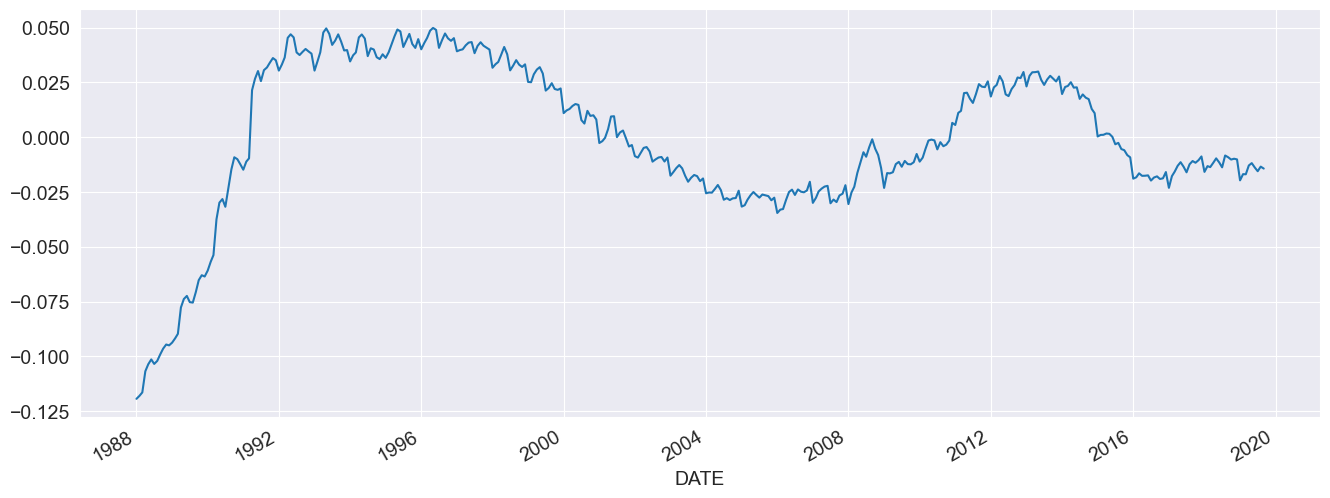

In [11]:
import statsmodels.api as sm

res = sm.OLS(with_trend["CPI"], with_trend[["const", "trend"]]).fit()

plt.rc("figure", figsize=(16, 6))
res.resid.plot.line()